# In linear regression, we have seen dependent and independent variabes relationship are linear, but in real life we will not get all data set linear.In this case, we have to use polynomial regression for non-linear data set analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/baren-kumar/ML-/refs/heads/main/gnp-bd.csv')




In [3]:
df.head()

,YEAR,GNP,POPULATION,TAX
0,1980,1499.68,82.498,19.400
1,1981,1583.50,84.764,22.500
2,1982,1634.27,87.061,24.400
3,1983,1709.60,89.400,27.000
4,1984,1781.02,91.804,32.265


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        40 non-null     int64  
 1   GNP         40 non-null     float64
 2   POPULATION  40 non-null     float64
 3   TAX         40 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


In [5]:
df.isnull().any()

,0
YEAR,False
GNP,False
POPULATION,False
TAX,False


In [ ]:
# We will draw regression plot between population and GNP

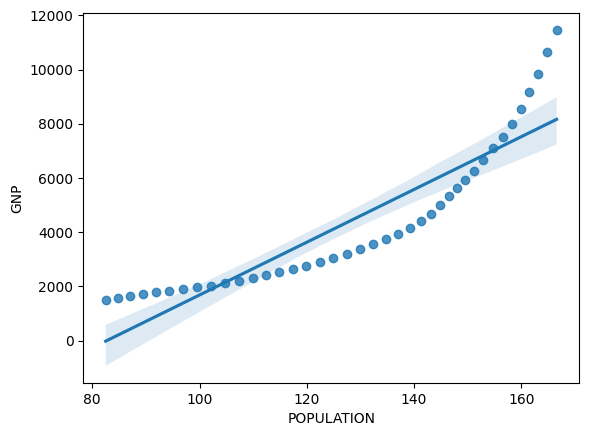

In [7]:
sns.regplot(x='POPULATION',y='GNP',data=df)
plt.show()

# We are seeing from the above plot, regression line can not fit the relation.
# We can take order function for best fitting.

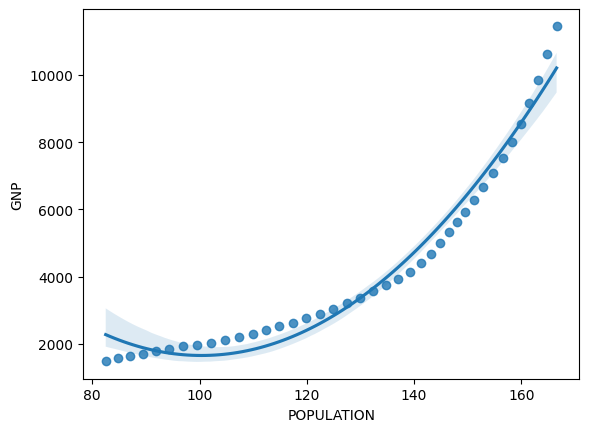

In [8]:
sns.regplot(x='POPULATION',y='GNP',data=df, order=2)
plt.show()

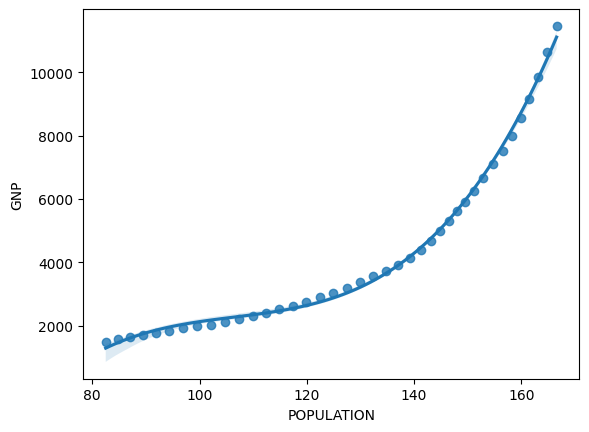

In [9]:
sns.regplot(x='POPULATION',y='GNP',data=df, order=3)
plt.show()

# Above results, this 3 degree order has fit the regression line with the data point.
#

In [ ]:
# Now we will transformation the model.

In [17]:
x=df['POPULATION'].values.reshape(-1,1)
y=df['GNP'].values.reshape(-1,1)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
x_ = pf.fit_transform(x)
x_test_ = pf.fit_transform(x_test)

poly = LinearRegression()
poly.fit(x_, y)
poly.coef_


array([[ 0.00000000e+00,  1.20802698e+03, -1.11503188e+01,
         3.49081200e-02]])

# Since degree=3, the feature set now contains: [1,x,x2,x3]
# Even though we call it “linear regression,” it’s linear in terms of the transformed features. So we’re fitting: =β0​+β1​x+β2​x2+β3​x3
# array([[ 0.00000000e+00,  1.28002698e+03, -1.11503188e+01,  3.49081200e-02]])= 0​=0.00000000,β1​=1280.02698,β2​=−11.1503188,β3​=0.03490812,
# So the fitted polynomial model is: ^​=1280.02698⋅x−11.1503188⋅x2+0.03490812⋅x3
# The array contains the coefficients of your polynomial regression model (constant, linear, quadratic, cubic). Your final regression equation is cubic in population with the weights shown above.

In [ ]:
# We will check the accuracy

In [20]:
predictions= poly.predict(x_test_)
print('Coefficients:', poly.coef_)
print('Intercept:', poly.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = poly.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')


Coefficients: [[ 0.00000000e+00  1.20802698e+03 -1.11503188e+01  3.49081200e-02]]
Intercept: [-42077.21061321]
MAE: 97.78921702436489
MSE: 18572.67307347991
RMSE: 136.2815947715608
AccuracyII: 99.7611721024753 %


In [ ]:
# Prediction the results

In [21]:
x=['200']
x

['200']

In [22]:
yhat= {'POPULATION':['200']}
yhatDf = pd.DataFrame(yhat)
yhatDfReshape=yhatDf['POPULATION'].values.reshape(-1,1)

polyFit = pf.fit_transform(yhatDfReshape)

poly.predict(polyFit)


array([[32780.39276676]])

# If the population of Bangladesh become 200 millions, then the GDP will 32780.39276676 Billions

In [ ]:
# Compare result between the linear regression

In [23]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

predictionsLN = linreg.predict(x_test)

print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictionsLN))
print('MSE:', metrics.mean_squared_error(y_test, predictionsLN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictionsLN)))
accuracy = linreg.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [[100.14883252]]
Intercept: [-8431.28106286]
MAE: 1299.7312045114136
MSE: 2155272.7183888806
RMSE: 1468.084710903591
AccuracyII: 72.28512826943647 %
